Yogendra Verma(1814)

In [42]:
pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 3.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
#plt.rcParams["figure.figsize"] = (10,5)
data = pd.read_csv('/content/drive/My Drive/ANN/cardio_train.csv',sep=";")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
print(data.shape)
data.info()

(69301, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
data.isnull().values.any()

False

In [7]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


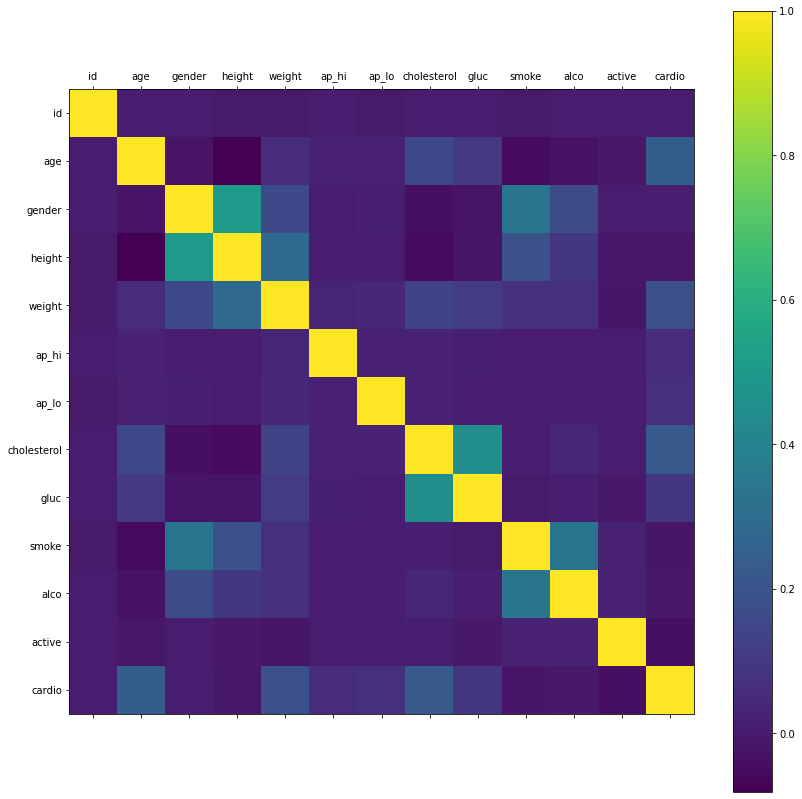

In [8]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7285512e10>,
      dtype=object)

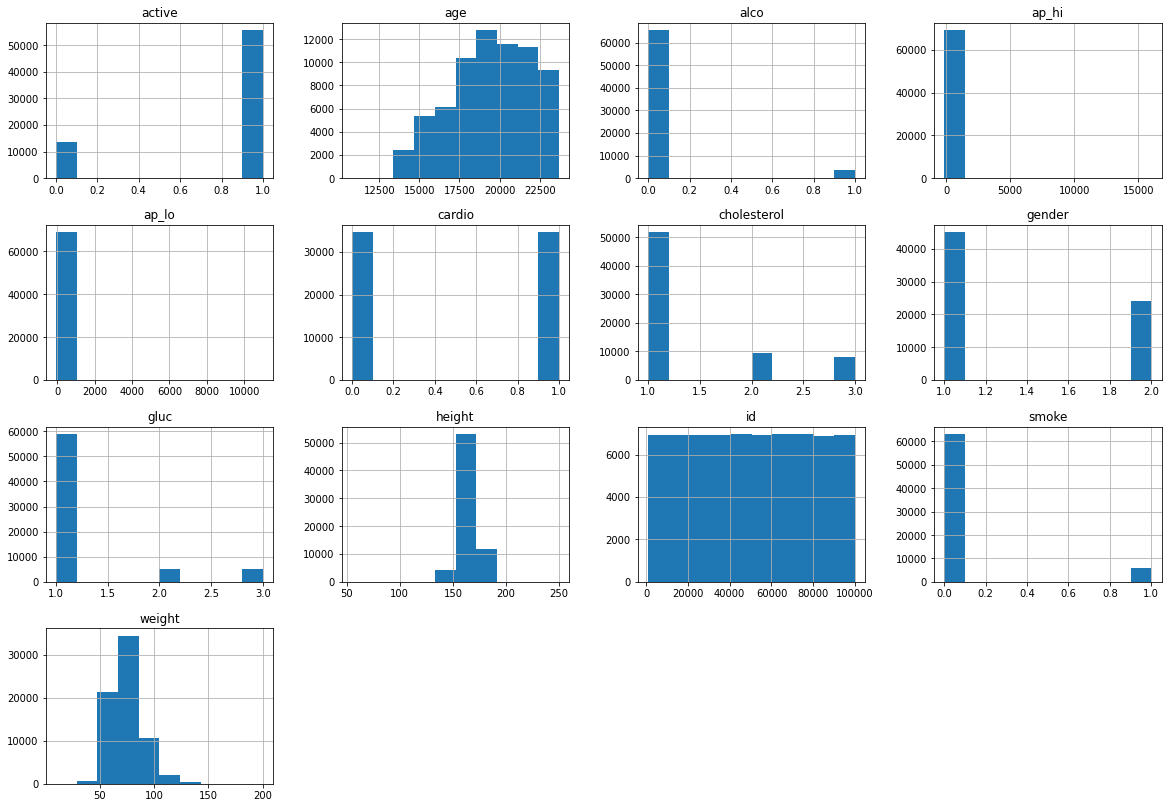

In [9]:
data.hist()

In [10]:
#sns.pairplot(data)

In [11]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [2]:
def continous_data(i):
    if data[i].dtype!='object':
        plt.rcParams["figure.figsize"] = (5,5)
        print('--'*60)
        sns.boxplot(data[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        #data[i].plot.hist(bins = 20)
        sns.distplot(data[i],rug=True)
        plt.show()
        plt.clf()

------------------------------------------------------------------------------------------------------------------------


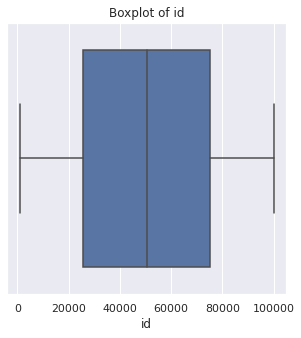

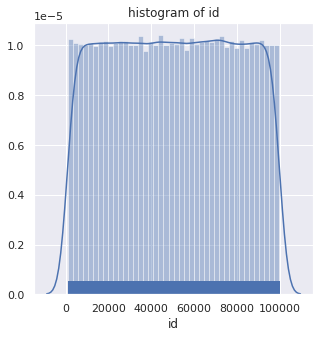

------------------------------------------------------------------------------------------------------------------------


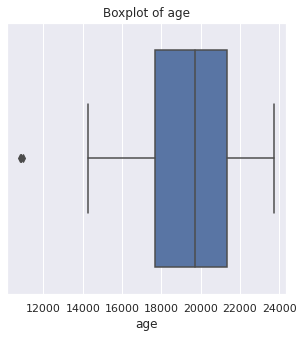

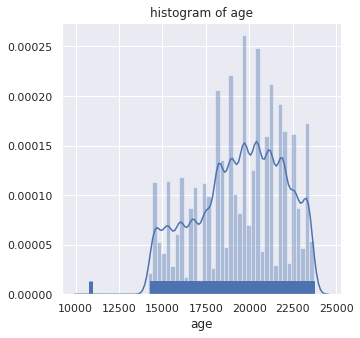

------------------------------------------------------------------------------------------------------------------------


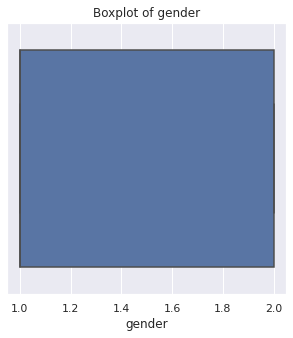

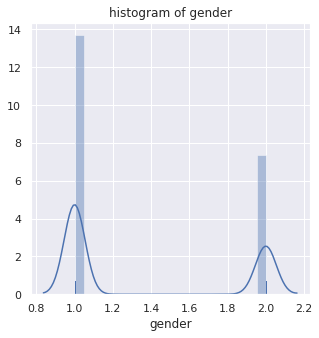

------------------------------------------------------------------------------------------------------------------------


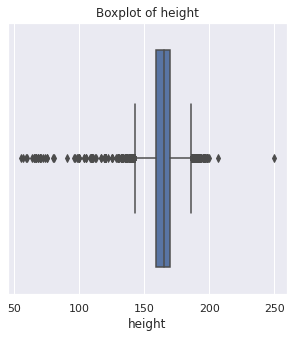

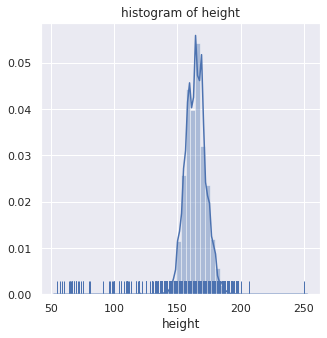

------------------------------------------------------------------------------------------------------------------------


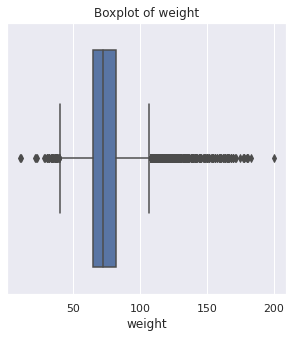

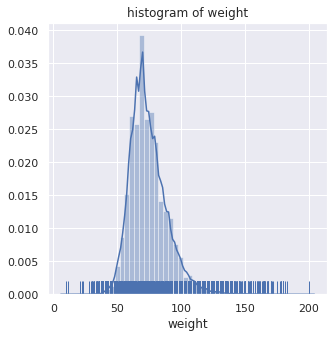

------------------------------------------------------------------------------------------------------------------------


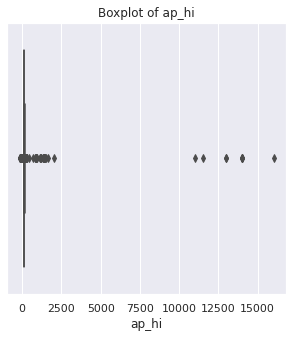

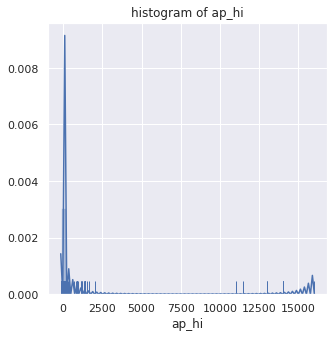

------------------------------------------------------------------------------------------------------------------------


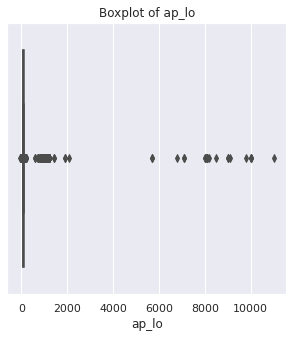

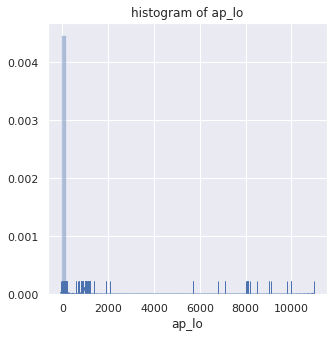

------------------------------------------------------------------------------------------------------------------------


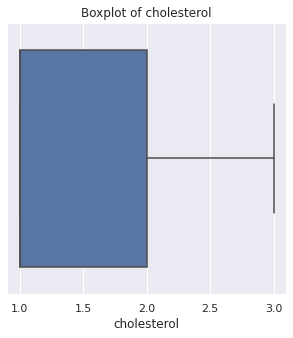

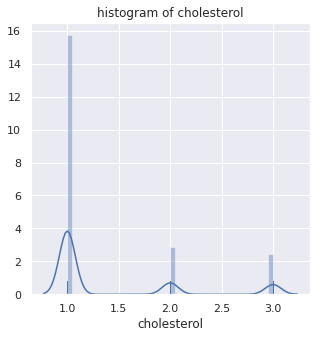

------------------------------------------------------------------------------------------------------------------------


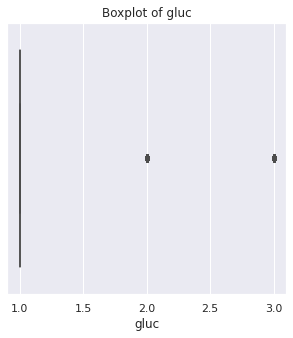

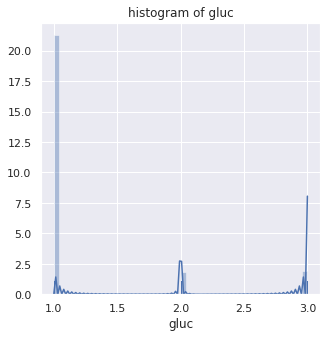

------------------------------------------------------------------------------------------------------------------------


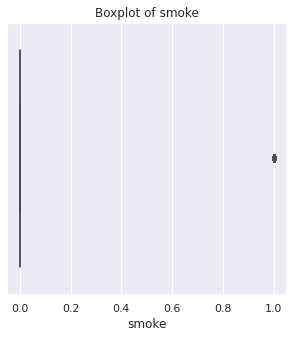

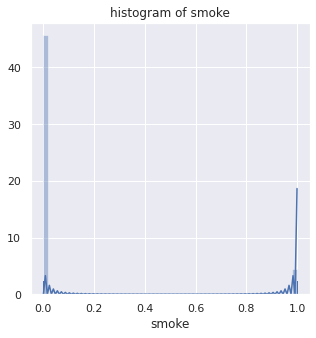

------------------------------------------------------------------------------------------------------------------------


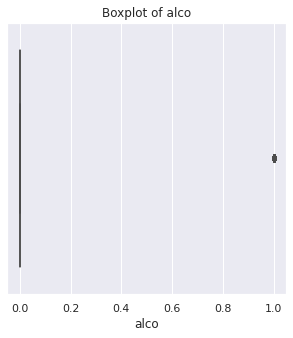

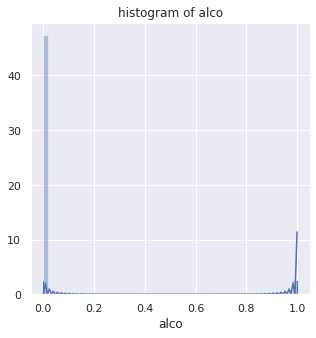

------------------------------------------------------------------------------------------------------------------------


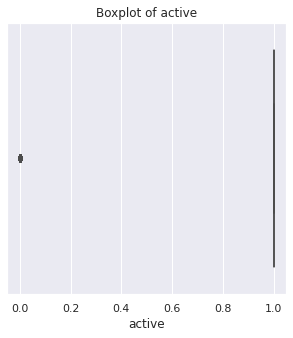

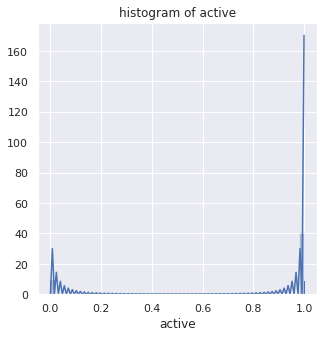

------------------------------------------------------------------------------------------------------------------------


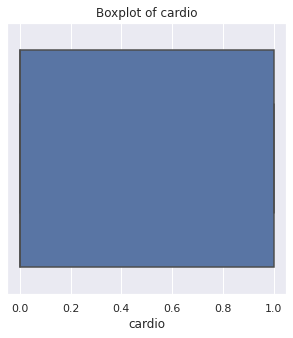

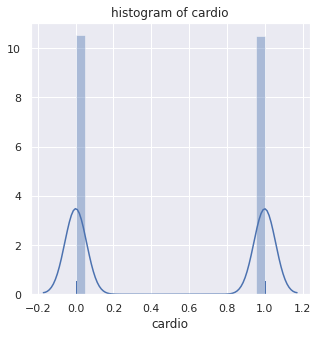

<Figure size 360x360 with 0 Axes>

In [19]:
sns.set() #Sets the default seaborn style
j=['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for k in j:
    continous_data(i=k)

In [14]:
# Corr wrt Target Index
num_feat = data.select_dtypes(include=['float64','int64']) 
data_corr = num_feat.corr()['cardio'][:-1]
data_corr
#print(type(data_corr))

id             0.004269
age            0.238095
gender         0.008592
height        -0.011015
weight         0.182094
ap_hi          0.054211
ap_lo          0.065290
cholesterol    0.220752
gluc           0.089062
smoke         -0.015225
alco          -0.007217
active        -0.035592
Name: cardio, dtype: float64

## Split Data in Features & Target

In [3]:
dataset = data.copy()
dataset=dataset.drop(["id"],axis=1)


In [4]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
X_feature=dataset.drop(["cardio"],axis=1)
Y_target=dataset["cardio"]

In [6]:
print(X_feature.shape)
print(Y_target.shape)

print(type(X_feature))
X_feature

(69301, 11)
(69301,)
<class 'pandas.core.frame.DataFrame'>


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
3,14549,2,165,85.0,120,80,1,1,1,1,1
4,23393,1,155,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1
69297,22601,1,158,126.0,140,90,2,2,0,0,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0
69299,22431,1,163,72.0,135,80,1,2,0,0,0


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
X_feature_scaled = sc.fit_transform(X_feature)
X_feature_scaled

array([[ 1.21601824, -0.73302344, -1.14099939, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.95391548, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.98580185, -0.73302344,  0.07772839, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [-0.16325352,  1.36421285,  2.27143838, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.20061644, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 0.43417421, -0.73302344,  0.68709227, ..., -0.31072844,
        -0.23864069,  0.49376463]])

# Apply Feature Selection

In [33]:
# # first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty).
# # The bigger the alpha the less features that will be selected.
# # Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero
# from sklearn.linear_model import Lasso
# from sklearn.feature_selection import SelectFromModel
# feature_sel_model = SelectFromModel(Lasso(alpha=0.010, random_state=0)) # remember to set the seed, the random state in this function
# feature_sel_model.fit(X_feature_scaled, Y_target)

In [ ]:
#feature_sel_model.get_support()

# Split data in Training and Testing 

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_feature_scaled,Y_target,test_size=0.2,random_state=101)

# Modeling 

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start_time_logreg = datetime.now()
logreg.fit(x_train, y_train)
end_time_logreg = datetime.now()
training_time_logreg = str(end_time_logreg-start_time_logreg)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_log)
acc_test_log = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_log)
print("Training Time = "+ training_time_logreg)

Training Accuracy: 71.99
Testing Accuracy: 71.64
Training Time = 0:00:00.234949


**Confusion Matrix & Classification Report**

[[5273 1654]
 [2277 4657]]


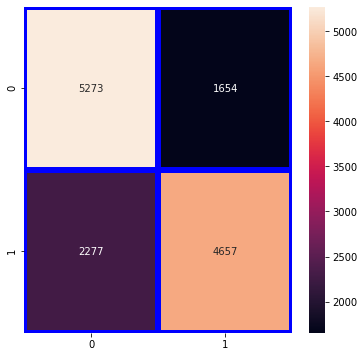

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6927
           1       0.74      0.67      0.70      6934

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.72     13861
weighted avg       0.72      0.72      0.72     13861



In [37]:
Ya = y_test  # Real Value
Yp = logreg.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(Ya,Yp)
print(cm_logreg)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_logreg,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

**ROC & AUC Curve**

[[0.66602315 0.33397685]
 [0.32167358 0.67832642]
 [0.40313532 0.59686468]
 ...
 [0.13358645 0.86641355]
 [0.33242093 0.66757907]
 [0.56769116 0.43230884]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   1
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.33397685 0.67832642 0.59686468 ... 0.86641355 0.66757907 0.43230884]
AUC is 0.78


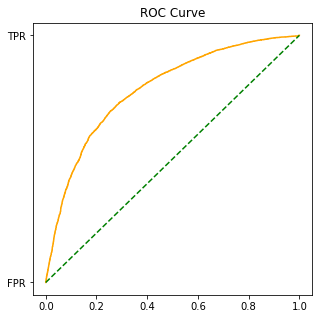

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = logreg.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)  

In [39]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
start_time_svc = datetime.now()
svc.fit(x_train, y_train)
end_time_svc = datetime.now()
training_time_svc = str(end_time_svc-start_time_svc)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_svc)
acc_test_svc = round(svc.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_svc)
print("Training Time = "+ training_time_svc)

Training Accuracy: 73.27
Testing Accuracy: 72.57
Training Time = 0:24:13.813405


[[5258 1669]
 [2133 4801]]


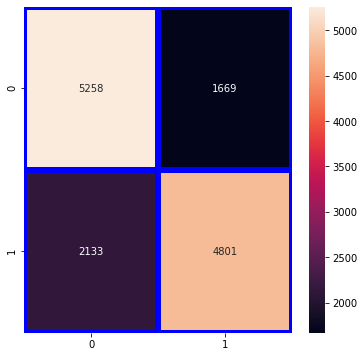

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6927
           1       0.74      0.69      0.72      6934

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861



In [40]:
Ya = y_test  # Real Value
Yp = svc.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(Ya,Yp)
print(cm_svc)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_svc,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.58514992 0.41485008]
 [0.31177748 0.68822252]
 [0.26511579 0.73488421]
 ...
 [0.26243443 0.73756557]
 [0.26752256 0.73247744]
 [0.66242325 0.33757675]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   1
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.41485008 0.68822252 0.73488421 ... 0.73756557 0.73247744 0.33757675]
AUC is 0.78


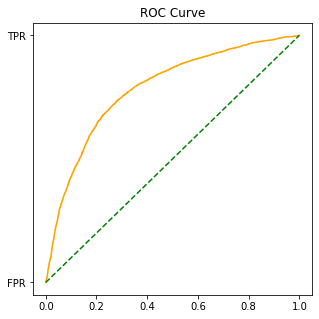

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = svc.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr) 

In [43]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
start_time_knn = datetime.now()
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2,3,4,5]}, cv=5).fit(x_train, y_train)
end_time_knn = datetime.now()
training_time_knn = str(end_time_knn-start_time_knn)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_knn,knn.best_params_)
acc_test_knn = round(knn.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_knn)
print("Training Time = "+ training_time_knn)

Training Accuracy: 76.54 {'n_neighbors': 5}
Testing Accuracy: 65.04
Training Time = 0:01:35.696461


[[4684 2243]
 [2603 4331]]


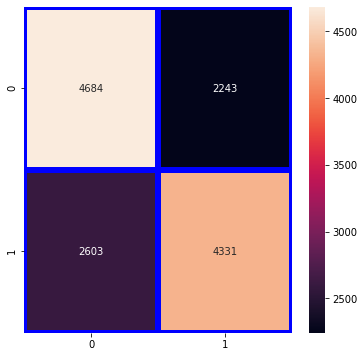

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6927
           1       0.66      0.62      0.64      6934

    accuracy                           0.65     13861
   macro avg       0.65      0.65      0.65     13861
weighted avg       0.65      0.65      0.65     13861



In [44]:
Ya = y_test  # Real Value
Yp = knn.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Ya,Yp)
print(cm_knn)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_knn,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]
 ...
 [0.2 0.8]
 [0.8 0.2]
 [0.8 0.2]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   1
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   0
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.2 0.6 0.6 ... 0.8 0.2 0.2]
AUC is 0.69


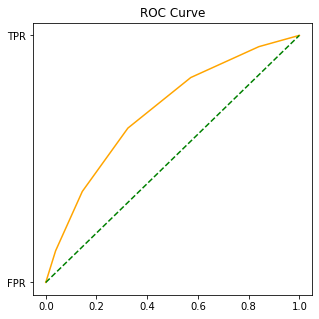

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = knn.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr) 

In [21]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
start_time_decision_tree = datetime.now()
decision_tree.fit(x_train, y_train)
# results = model_selection.cross_val_score(decision_tree,x_test,y_test, cv=10)
# print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
end_time_decision_tree = datetime.now()
training_time_decision_tree = str(end_time_decision_tree-start_time_decision_tree)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_decision_tree)
acc_test_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_decision_tree)
print("Training Time = "+ training_time_decision_tree)

Training Accuracy: 71.32
Testing Accuracy: 71.67
Training Time = 0:00:00.942694


**Preventing Overfitting in Decision Trees**

The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree

[Text(514.9011551304409, 538.2705882352941, 'X[4] <= 0.004\ngini = 0.5\nsamples = 55440\nvalue = [27752, 27688]'),
 Text(336.7080775506558, 527.6117647058824, 'X[0] <= 0.269\ngini = 0.434\nsamples = 32703\nvalue = [22277, 10426]'),
 Text(199.74254350865723, 516.9529411764706, 'X[6] <= 1.666\ngini = 0.364\nsamples = 20265\nvalue = [15423, 4842]'),
 Text(97.15894186027778, 506.29411764705884, 'X[0] <= -1.366\ngini = 0.348\nsamples = 19404\nvalue = [15054, 4350]'),
 Text(40.54555588097569, 495.63529411764705, 'X[6] <= 0.196\ngini = 0.246\nsamples = 5367\nvalue = [4598, 769]'),
 Text(22.941420812527255, 484.9764705882353, 'X[5] <= -0.12\ngini = 0.221\nsamples = 4825\nvalue = [4216, 609]'),
 Text(11.123617084527654, 474.3176470588235, 'X[3] <= -0.257\ngini = 0.16\nsamples = 1920\nvalue = [1752, 168]'),
 Text(5.42086716618789, 463.6588235294118, 'X[2] <= 3.49\ngini = 0.128\nsamples = 1300\nvalue = [1211, 89]'),
 Text(5.345971489435551, 453.0, 'X[4] <= -0.054\ngini = 0.126\nsamples = 1299\nva

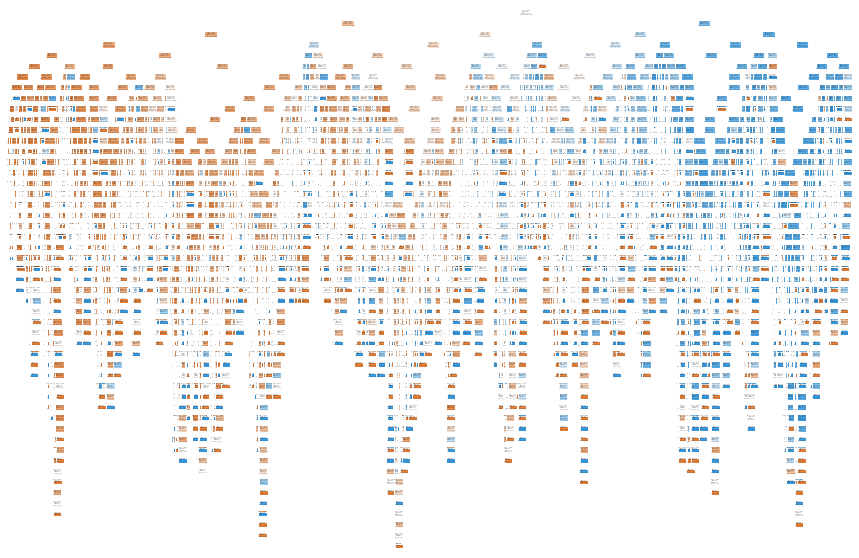

In [41]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)


In [13]:
path = decision_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [14]:
ccp_alphas


array([0.00000000e+00, 6.01250601e-06, 6.01250601e-06, ...,
       1.03872556e-02, 1.22632975e-02, 9.38399706e-02])

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09383997057193116


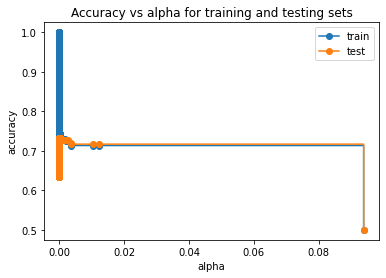

In [16]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [18]:
clf_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)

In [20]:
start_time_clf_tree = datetime.now()
clf_tree.fit(x_train, y_train)
# results = model_selection.cross_val_score(decision_tree,x_test,y_test, cv=10)
# print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
end_time_clf_tree = datetime.now()
training_time_clf_tree = str(end_time_clf_tree-start_time_clf_tree)
acc_clf_tree = round(clf_tree.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_clf_tree)
acc_test_clf_tree = round(clf_tree.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_clf_tree)
print("Training Time = "+ training_time_clf_tree)

Training Accuracy: 71.32
Testing Accuracy: 71.67
Training Time = 0:00:00.985747


[Text(502.20000000000005, 453.0, 'X[4] <= 0.004\ngini = 0.5\nsamples = 55440\nvalue = [27752, 27688]'),
 Text(334.8, 271.8, 'X[0] <= 0.269\ngini = 0.434\nsamples = 32703\nvalue = [22277, 10426]'),
 Text(167.4, 90.59999999999997, 'gini = 0.364\nsamples = 20265\nvalue = [15423, 4842]'),
 Text(502.20000000000005, 90.59999999999997, 'gini = 0.495\nsamples = 12438\nvalue = [6854, 5584]'),
 Text(669.6, 271.8, 'gini = 0.366\nsamples = 22737\nvalue = [5475, 17262]')]

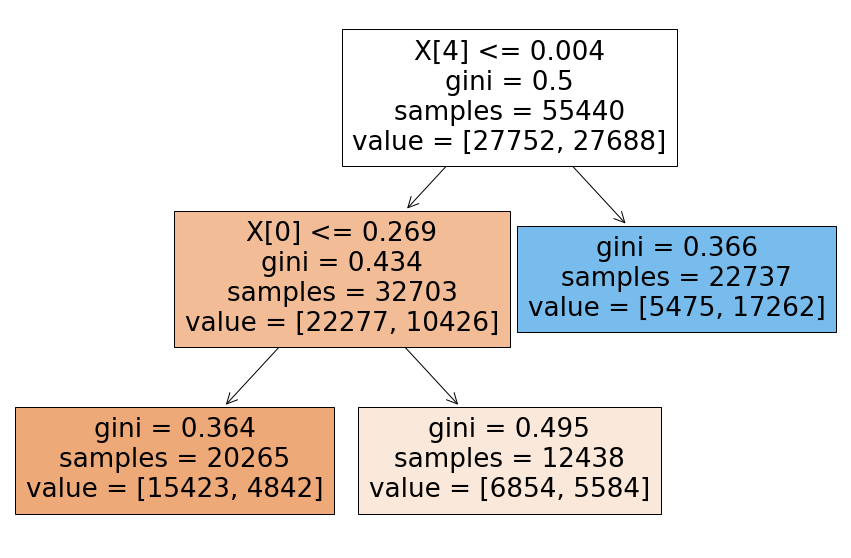

In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_tree,filled=True)

[[5610 1317]
 [2610 4324]]


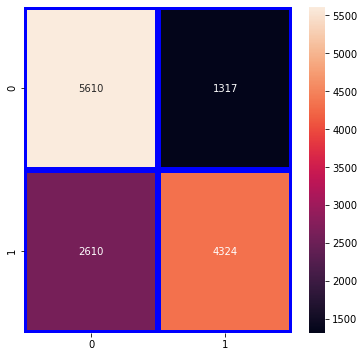

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      6927
           1       0.77      0.62      0.69      6934

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.71     13861
weighted avg       0.72      0.72      0.71     13861



In [25]:
Ya = y_test  # Real Value
Yp = decision_tree.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_decision_tree = confusion_matrix(Ya,Yp)
print(cm_decision_tree)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_decision_tree,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.24079694 0.75920306]
 [0.55105322 0.44894678]
 [0.76106588 0.23893412]
 ...
 [0.24079694 0.75920306]
 [0.24079694 0.75920306]
 [0.55105322 0.44894678]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   1
1       0   0
2       0   0
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.75920306 0.44894678 0.23893412 ... 0.75920306 0.75920306 0.44894678]
AUC is 0.75


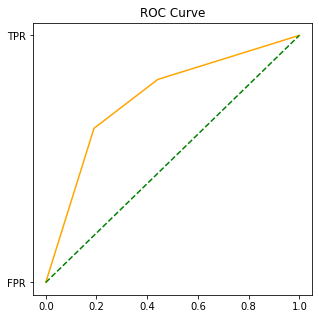

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = decision_tree.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr) 

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
random_forest = GridSearchCV(estimator=RandomForestClassifier(random_state=0, ccp_alpha=0.012), param_grid={'n_estimators': [100, 300]}, cv=10).fit(x_train, y_train)
start_time_random_forest = datetime.now()
random_forest.fit(x_train, y_train)
end_time_random_forest = datetime.now()
training_time_random_forest = str(end_time_random_forest-start_time_random_forest)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_random_forest,random_forest.best_params_)
acc_test_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_random_forest)
print("Training Time = "+ training_time_random_forest)

Training Accuracy: 71.42 {'n_estimators': 100}
Testing Accuracy: 71.7
Training Time = 0:30:14.096199


[[5525 1402]
 [2520 4414]]


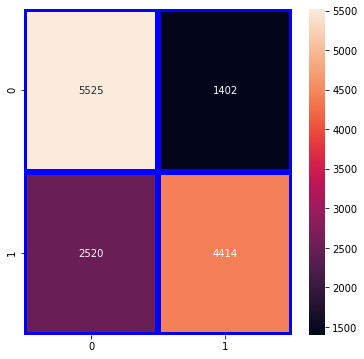

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6927
           1       0.76      0.64      0.69      6934

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.72     13861
weighted avg       0.72      0.72      0.72     13861



In [27]:
Ya = y_test  # Real Value
Yp = random_forest.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_random_forest = confusion_matrix(Ya,Yp)
print(cm_random_forest)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_random_forest,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.44087127 0.55912873]
 [0.51782571 0.48217429]
 [0.56742542 0.43257458]
 ...
 [0.35209436 0.64790564]
 [0.24683086 0.75316914]
 [0.60059934 0.39940066]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   1
1       0   0
2       0   0
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.55912873 0.48217429 0.43257458 ... 0.64790564 0.75316914 0.39940066]
AUC is 0.78


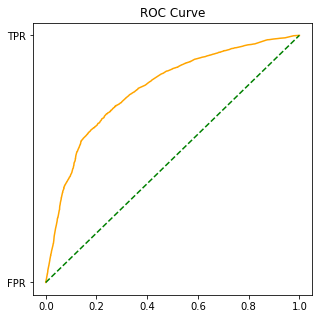

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = random_forest.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)  

**NN Model**

In [30]:
# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Dense(16, input_dim = x_train.shape[1], kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
______________________________________________________

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
es = EarlyStopping(monitor='val_accuracy', patience=20, mode='max')
start_time_ann2 = datetime.now()

hist = model.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), 
               epochs=500, verbose=1, callbacks=[es])
end_time_ann2 = datetime.now()
training_time_ann2 = str(end_time_ann2-start_time_ann2)
print("Training Time = "+ training_time_ann2)

Epoch 1/500
867/867 [==============================] - 2s 2ms/step - loss: 0.6652 - accuracy: 0.6126 - val_loss: 0.6226 - val_accuracy: 0.6596
Epoch 2/500
867/867 [==============================] - 2s 2ms/step - loss: 0.6271 - accuracy: 0.6564 - val_loss: 0.6093 - val_accuracy: 0.6803
Epoch 3/500
867/867 [==============================] - 2s 2ms/step - loss: 0.6100 - accuracy: 0.6784 - val_loss: 0.5881 - val_accuracy: 0.7049
Epoch 4/500
867/867 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.6988 - val_loss: 0.5674 - val_accuracy: 0.7194
Epoch 5/500
867/867 [==============================] - 2s 2ms/step - loss: 0.5806 - accuracy: 0.7093 - val_loss: 0.5627 - val_accuracy: 0.7248
Epoch 6/500
867/867 [==============================] - 2s 2ms/step - loss: 0.5713 - accuracy: 0.7156 - val_loss: 0.5618 - val_accuracy: 0.7271
Epoch 7/500
867/867 [==============================] - 2s 2ms/step - loss: 0.5652 - accuracy: 0.7193 - val_loss: 0.5532 - val_accuracy: 0.7275

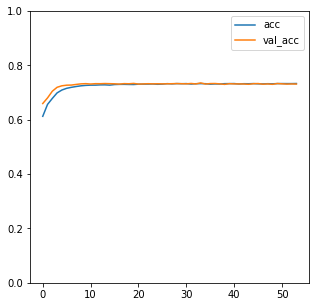

In [33]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.ylim((0, 1))
plt.legend()

In [34]:
# Predicting the Train set results
from sklearn import metrics
nn_prediction = model.predict(x_train)
nn_prediction = (nn_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_ann2 = round(metrics.accuracy_score(y_train, nn_prediction) * 100, 2)
acc_ann2

73.37

In [35]:
# Predicting the Test set results
nn_prediction_test = model.predict(x_test)
nn_prediction_test = (nn_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_test_ann2 = round(metrics.accuracy_score(y_test, nn_prediction_test) * 100, 2)
acc_test_ann2

73.12

# Models evaluation 

In [46]:
## We can now rank our evaluation of all the models to choose the best one for our problem.

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'k-Nearest Neighbors', 
              'Decision Tree Classifier', 'Random Forest','Neural Network 2' ],
  'Score_train': [acc_log, 
                  acc_svc,
                  acc_knn,
                  acc_decision_tree, 
                  acc_random_forest,
                  acc_ann2],'Score_test': [acc_test_log, 
                                           acc_test_svc, 
                                           acc_test_knn, 
                                           acc_test_decision_tree, 
                                           acc_test_random_forest, 
                                           acc_test_ann2],'Training_time': [training_time_logreg,
                                                                            training_time_svc,
                                                                            training_time_knn,
                                                                            training_time_decision_tree,
                                                                            training_time_random_forest,
                                                                            training_time_ann2]})

In [47]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test,Training_time
2,k-Nearest Neighbors,76.54,65.04,0:01:35.696461
5,Neural Network 2,73.37,73.12,0:01:33.027421
1,Support Vector Machines,73.27,72.57,0:24:13.813405
0,Logistic Regression,71.99,71.64,0:00:00.234949
4,Random Forest,71.42,71.70,0:30:14.096199
3,Decision Tree Classifier,71.32,71.67,0:00:00.942694


In [48]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test,Training_time
5,Neural Network 2,73.37,73.12,0:01:33.027421
1,Support Vector Machines,73.27,72.57,0:24:13.813405
4,Random Forest,71.42,71.70,0:30:14.096199
3,Decision Tree Classifier,71.32,71.67,0:00:00.942694
0,Logistic Regression,71.99,71.64,0:00:00.234949
2,k-Nearest Neighbors,76.54,65.04,0:01:35.696461


In [49]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Training_time,Score_diff
5,Neural Network 2,73.37,73.12,0:01:33.027421,0.25
4,Random Forest,71.42,71.70,0:30:14.096199,0.28
0,Logistic Regression,71.99,71.64,0:00:00.234949,0.35
3,Decision Tree Classifier,71.32,71.67,0:00:00.942694,0.35
1,Support Vector Machines,73.27,72.57,0:24:13.813405,0.70
2,k-Nearest Neighbors,76.54,65.04,0:01:35.696461,11.50


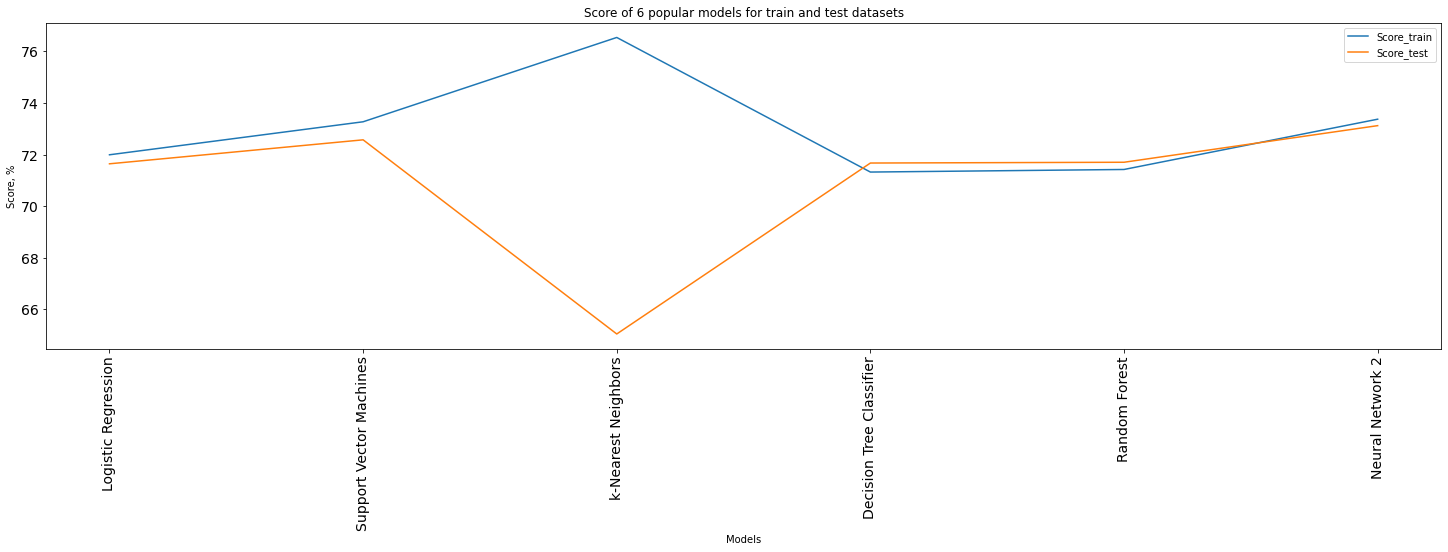

In [50]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 6 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()